# Quiz 5

Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

They've hired you on contract to help them to build a linear regression model to estimate how much a customer is willing to spend in a year. 

## Imports
**Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 
(You'll import sklearn as you need it.)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

We'll work with the attached csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

**Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [2]:
data = pd.read_csv("Ecommerce Customers.csv")

**Check the head of customers, and check out its info() and describe() methods.**

In [3]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Training and Testing Data

Go ahead and build linear regression model.

**Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column.**

You can add as many lines as you want

In [6]:
data.select_dtypes('float64').columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [7]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2)

In [8]:
train_X = train[['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership']]

In [9]:
train_y = train['Yearly Amount Spent']

In [10]:
test_X = test[['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership']]

In [11]:
test_y = test['Yearly Amount Spent']

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipline = Pipeline([
    ('std_scale',StandardScaler())
])

train_X = num_pipline.fit_transform(train_X)
test_X = num_pipline.fit_transform(test_X)

In [13]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Print out the coefficients of the model**

In [14]:
linear_reg.coef_

array([25.42967648, 37.92631978,  0.29671048, 61.25476586])

## Evaluating the Model

Evaluate the model performance by calculating  Root Mean Squared Error


In [15]:
# RMSE for the model
from sklearn.metrics import mean_squared_error

pred = linear_reg.predict(train_X)
mse = mean_squared_error(train_y, pred)
rmse = np.sqrt(mse)
rmse

9.863884515827259

In [16]:
# RMSE using Cross-Validation 

from sklearn.model_selection import cross_val_score

scores = cross_val_score(linear_reg, train_X, train_y,
                         scoring="neg_mean_squared_error", cv=4)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([ 9.55508655, 10.40318042, 10.79779821,  9.06610373])

In [17]:
sum(tree_rmse_scores)/len(tree_rmse_scores)

9.955542225856934

## Learning Curve

Build a learning curve. Discuss the model fit....

In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              

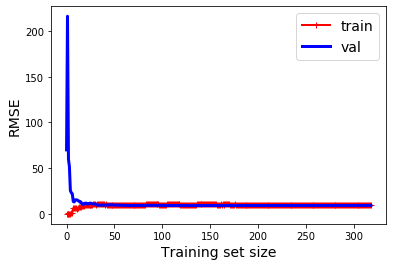

In [19]:
plot_learning_curves(linear_reg, train_X, train_y)
plt.show()

overfitting 

Problem: Should have done scaling before spliting data